<a href="https://colab.research.google.com/github/JangAyeon/Python_Machine_Learning/blob/main/%5B3_6%5D%ED%94%BC%EB%A7%88%EC%9D%B8%EB%94%94%EC%96%B8%EB%8B%B9%EB%87%A8%EB%B3%91%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer

from sklearn.linear_model import LogisticRegression

In [ ]:
diabetes_data=pd.read_csv("diabetes.csv")

#target값의 분포 확인
print(diabetes_data["Outcome"].value_counts())
diabetes_data.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#평가 지표 함수
def get_clf_eval(y_test,pred=None,pred_proba=None):

  confusion=confusion_matrix(y_test,pred)

  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  f1=f1_score(y_test,pred)

  roc_auc=roc_auc_score(y_test,pred_proba)

  print("오차행렬")
  print(confusion)

  print("정확도: {0:.4f},  정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}".format(accuracy,precision,recall,f1,roc_auc))

In [ ]:
#정밀값과 재현율 tradeoff 그래프 그리는 함수
def precision_recall_curve_plot(y_test,pred_proba_c1):
  precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)

  plt.figure(figsize=(8,6))
  threshold_boundary=thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary],linestyle="--",label="precision")
  plt.plot(thresholds,recalls[0:threshold_boundary],label="recall")

  start,end=plt.xlim()
  plt.xtricks=(np.round(np.arange(start,end,0.1),2))

  plt.xlabel("Threshold value")
  plt.ylabel("Precision and Recall value")
  plt.show()

In [ ]:
#임계값에 따른 평가지표 보여주는 함수
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
  for custom_threshold in thresholds:
    binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict=binarizer.transform(pred_proba_c1)
    print("임곗값: ",custom_threshold)
    get_clf_eval(y_test,custom_predict,pred_proba_c1)


In [ ]:
#X : feature dataset 설정, Y : label dataset 설정
#맨 끝 column이 Outcome으로 레이블 값임, 칼럼 위치 -1을 이용해 추출
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

#logistic regression 학습,예측,평가
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)

#roc_auc_score 계산을 위한 1 예측 확률 계산
pred_proba=lr_clf.predict_proba(X_test)[:,1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도: 0.7727,  정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392, AUC: 0.7919


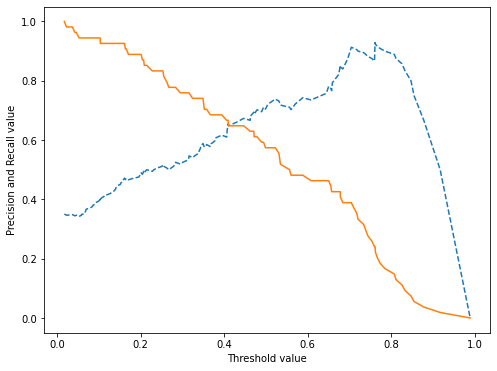

In [ ]:
#precision recall 곡선 그림
pred_proba_c1=lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [ ]:
#각 피쳐들의 4분위 값 확인
#Glucose	BloodPressure	SkinThickness	Insulin	에서 0 나오기는 어려움
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

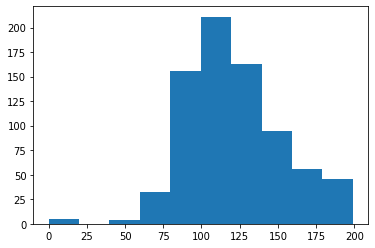

In [ ]:
#0의 갯수가 몇 개인지 확인
plt.hist(diabetes_data["Glucose"],bins=10)

In [ ]:
#0값이 있는 피처들에서 0값의 데이터 건수와 퍼센트 계산

#0값을 검사한 피처명 리스트
zero_features=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

#전체 데이터 갯수
total_cnt=diabetes_data["Glucose"].count()

for feature in zero_features: #피처별로 반복하며
  zero_count=diabetes_data[diabetes_data[feature]==0][feature].count() #데이터 값이 0인 데이터 건수 추출
  print("{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%".format(feature,zero_count,100*zero_count/total_cnt)) #퍼센트 계산

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [ ]:
#0값을 평균값으로 대체
mean_zero_features=diabetes_data[zero_features].mean() #zero_features 리스트 내부의 저장된 개별 feature에 대해서 평균값 구하기
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,mean_zero_features) #0을 평균값으로 대체

In [ ]:
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

#StandatdScaler이용해 일괄적으로 스케일링 적용하고 0값을 평균값으로 대체해 학습, 평가
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=156,stratify=y)

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987,  정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


In [ ]:
#분류 결정 임계값을 변경하며 성능 측정

thresholds=[0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)


임곗값:  0.3
오차행렬
[[67 33]
 [11 43]]
정확도: 0.7143,  정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615, AUC: 0.8433
임곗값:  0.33
오차행렬
[[72 28]
 [12 42]]
정확도: 0.7403,  정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774, AUC: 0.8433
임곗값:  0.36
오차행렬
[[76 24]
 [15 39]]
정확도: 0.7468,  정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, AUC: 0.8433
임곗값:  0.39
오차행렬
[[78 22]
 [16 38]]
정확도: 0.7532,  정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC: 0.8433
임곗값:  0.42
오차행렬
[[84 16]
 [18 36]]
정확도: 0.7792,  정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC: 0.8433
임곗값:  0.45
오차행렬
[[85 15]
 [18 36]]
정확도: 0.7857,  정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC: 0.8433
임곗값:  0.48
오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987,  정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
임곗값:  0.5
오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987,  정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


In [ ]:
#임계값을 0.48로 설정한 Binarizer 생성
binarizer=Binarizer(threshold=0.48)
#위에서 구한 lr_clf의 predict_proba()예측 확률 array에서 1에 해당하는 column값을 binarizer변환
pred_th_048=binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test,pred_th_048,pred_proba[:,1])

오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987,  정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
